 Which is the loudest holiday of the year. To do this we are going to look at 311 noise complaints from the New York Open Data Portal.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from fbprophet import Prophet
from datetime import datetime
%matplotlib inline

In [74]:
df = pd.read_csv('311_Service_Requests.csv')
df.head()

<ipython-input-74-1b85bf442fc4>:1: DtypeWarning: Columns (0,8,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('311_Service_Requests.csv')


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,31353441,08/20/2015 05:16:31 PM,10/31/2016 05:00:14 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11234,1443 EAST 52 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.624491,-73.925507,"(40.62449081226804, -73.92550654225785)"
1,31408261,08/27/2015 02:31:04 PM,NaN,DPR,Department of Parks and Recreation,Dead Tree,Dead/Dying Tree,Street,11357,21-46 CLINTONVILLE STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.778695,-73.804306,"(40.77869514627701, -73.80430635159907)"
2,31394147,08/26/2015 10:01:54 AM,01/31/2018 12:00:00 AM,DOB,Department of Buildings,Building/Use,No Certificate Of Occupancy/Illegal/Contrary T...,NaN,11101,10-57 JACKSON AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.742563,-73.952617,"(40.742563312591635, -73.95261703153102)"
3,31416211,08/29/2015 07:40:00 AM,09/05/2015 02:15:00 PM,DEP,Department of Environmental Protection,Noise,Noise: Construction Before/After Hours (NM1),NaN,10036,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.760823,-73.998314,"(40.76082287001736, -73.99831424894528)"
4,31429992,08/31/2015 10:09:51 AM,09/09/2015 01:00:49 PM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,NO LIGHTING,RESIDENTIAL BUILDING,11691,24-73 COLLIER AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.598572,-73.759303,"(40.59857161005251, -73.75930342532548)"


In [77]:
cols = ['Complaint Type', 'Created Date','Descriptor','Borough','Latitude','Longitude']
all_data = pd.DataFrame()
for index, chunk in enumerate(pd.read_csv('311_Service_Requests.csv', usecols=cols, chunksize=100000)):
    chunk  = chunk.dropna(subset=['Descriptor', 'Complaint Type'], how='all')
    all_data = all_data.append(chunk)
df1=all_data

<ipython-input-77-a86f7acab579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(chunk)
<ipython-input-77-a86f7acab579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(chunk)
<ipython-input-77-a86f7acab579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(chunk)
<ipython-input-77-a86f7acab579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all_data.append(chunk)
<ipython-input-77-a86f7acab579>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_data = all

In [78]:
all_data['Complaint Type'].value_counts().head(20)

HEAT/HOT WATER                   202803
Noise - Residential              170784
Illegal Parking                   90020
Blocked Driveway                  89599
Street Light Condition            76380
Street Condition                  74470
UNSANITARY CONDITION              63802
Noise                             51017
PAINT/PLASTER                     50467
Water System                      48251
PLUMBING                          42729
Noise - Street/Sidewalk           41097
Noise - Commercial                40685
DOOR/WINDOW                       31610
Traffic Signal Condition          30396
WATER LEAK                        26239
Sewer                             25626
Sanitation Condition              25036
Dirty Conditions                  24889
General Construction/Plumbing     24043
Name: Complaint Type, dtype: int64

In [80]:
all_data[all_data['Complaint Type'].str.contains("Noise")]['Complaint Type'].value_counts()

Noise - Residential         170784
Noise                        51017
Noise - Street/Sidewalk      41097
Noise - Commercial           40685
Noise - Vehicle              16264
Noise - Park                  2425
Noise - Helicopter            1020
Noise - House of Worship       656
Collection Truck Noise         159
Noise Survey                     5
Name: Complaint Type, dtype: int64

In [81]:
df['Created Date'] = pd.to_datetime(df['Created Date'])

In [37]:
df['YearMonth'] = df['Created Date'].dt.to_period('M')

In [38]:
festivals_noise_df = df[df['Complaint Type'] == 'Noise']

In [39]:
grouped_df = festivals_noise_df.groupby(['YearMonth', 'Borough']).size().reset_index(name='Complaint Count')

In [40]:
pivot_df = grouped_df.pivot(index='YearMonth', columns='Borough', values='Complaint Count').fillna(0)

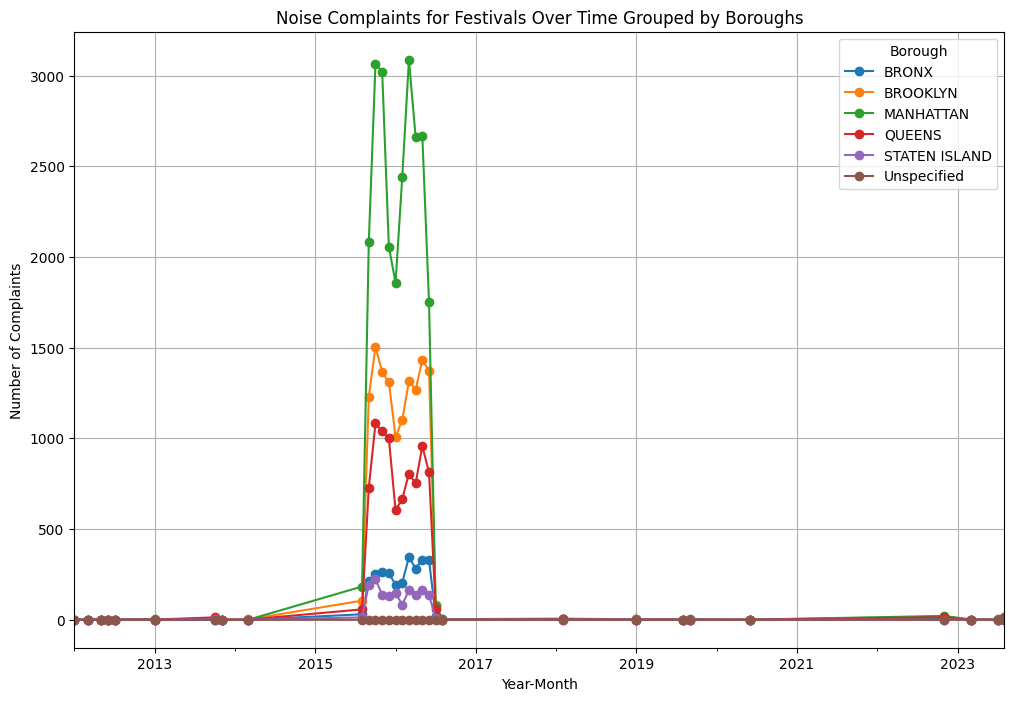

In [41]:
pivot_df.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Noise Complaints for Festivals Over Time Grouped by Boroughs')
plt.xlabel('Year-Month')
plt.ylabel('Number of Complaints')
plt.legend(title='Borough')
plt.grid(True)
plt.show()

In [23]:
all_data[all_data['Complaint Type']=='Noise - Commercial'].Descriptor.value_counts()

Loud Music/Party    26735
Banging/Pounding     8100
Loud Talking         3822
Car/Truck Horn       1056
Car/Truck Music       886
Loud Television        86
Name: Descriptor, dtype: int64

In [24]:
cleaned = all_data[
    all_data['Complaint Type'].isin([
        'Noise - Residential',
        'Noise Survey',
        'Noise - Park',
        'Noise - Street/Sidewalk'
    ]) |
    all_data['Descriptor'].isin(['Car/Truck Music','Car/Truck Horn','Loud Music/Party'])
]

In [25]:
cleaned.shape

(255295, 6)

In [26]:
cleaned = cleaned.assign(date = pd.to_datetime(cleaned['Created Date'], format='%m/%d/%Y %I:%M:%S %p'))

Text(0, 0.5, 'Calls per day')

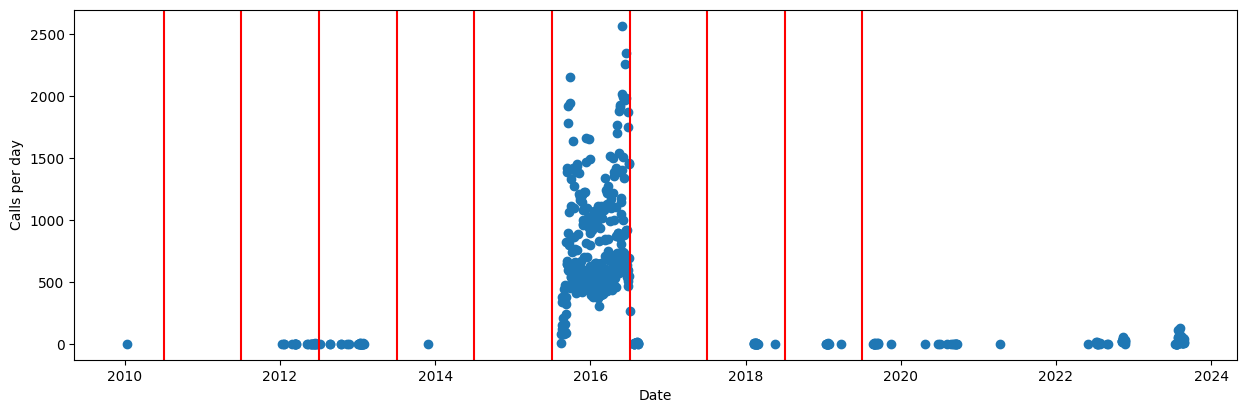

In [27]:
trend = cleaned.groupby(cleaned.date.dt.floor('d')).count()[['Descriptor']]

plt.figure(figsize=(15,10))
plt.subplot(211)
plt.scatter(trend.index,trend.Descriptor)
for year in range(2010,2020):
    plt.axvline(datetime(year,7,4), color='red')
plt.xlabel("Date")
plt.ylabel('Calls per day')

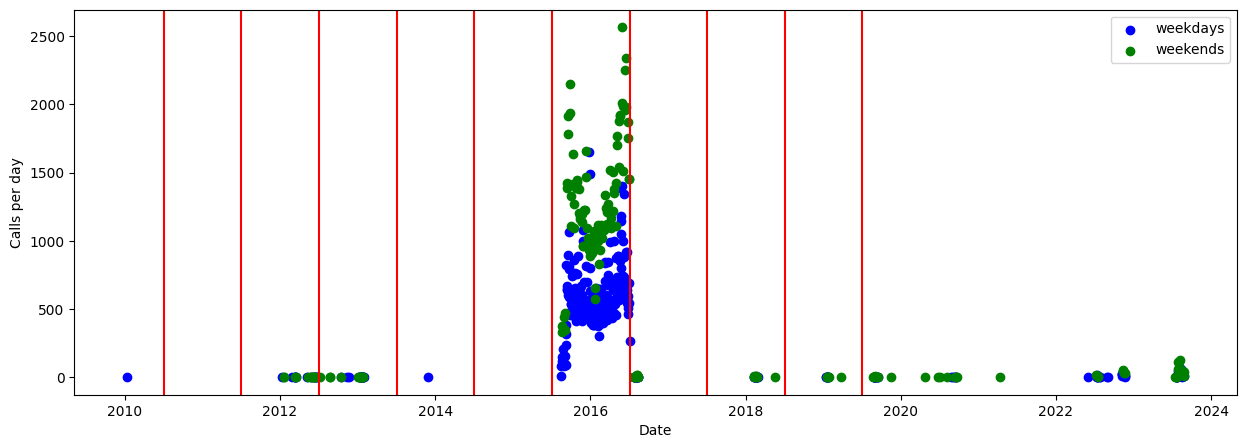

In [28]:
weekdays = (pd.DatetimeIndex(trend.index).dayofweek) < 5
friday = (pd.DatetimeIndex(trend.index).dayofweek == 4)

plt.figure(figsize=(15,5))
plt.scatter(trend[weekdays].index,trend[weekdays].Descriptor,color='blue',label='weekdays')
plt.scatter(trend[~weekdays].index,trend[~weekdays].Descriptor,color='green', label='weekends')
# plt.scatter(trend[friday].index,trend[friday].Descriptor,color='orange', label='fridays')

for year in range(2010,2020):
    plt.axvline(datetime(year,7,4), color='red')
plt.xlabel('Date')
plt.ylabel('Calls per day')
plt.legend()

<Figure size 1200x800 with 0 Axes>

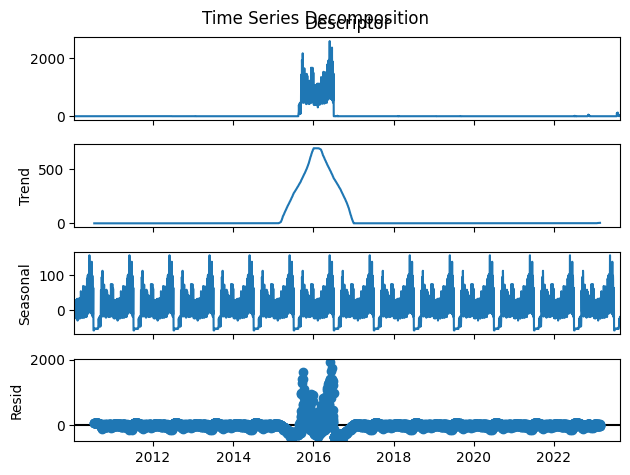

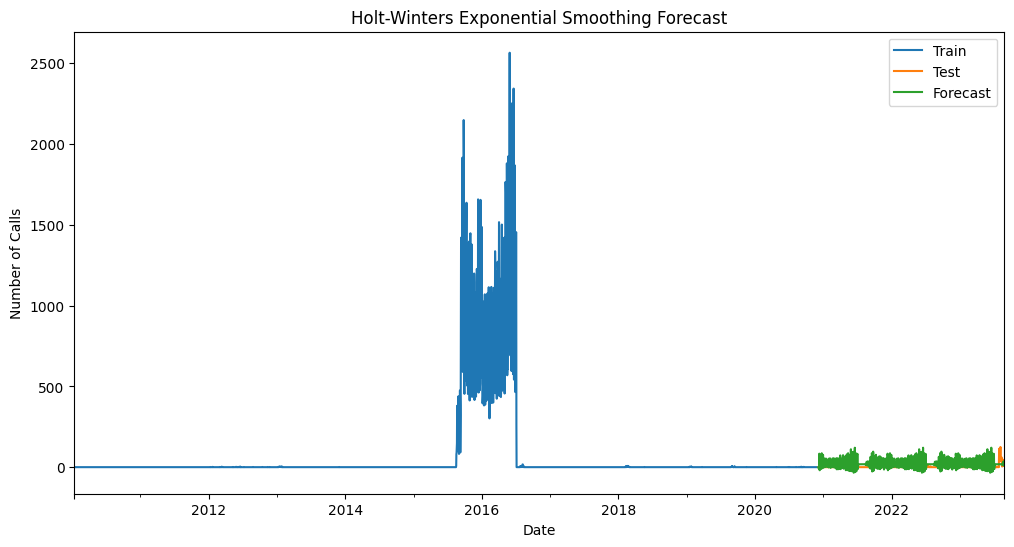

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import timedelta

# Assuming 'cleaned' is your DataFrame with a 'date' column
#cleaned['date'] = pd.to_datetime(cleaned['date'])
#cleaned = cleaned.set_index('date')

# Resample to daily frequency
daily_data = cleaned.resample('D').count()['Descriptor']


# Decompose the time series into trend, seasonal, and residual components
result = seasonal_decompose(daily_data, model='additive', period=365)  # Assuming yearly seasonality

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle('Time Series Decomposition')
plt.show()

# Forecasting using Holt-Winters Exponential Smoothing
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Fit the model
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=365)
fit_model = model.fit()

# Forecast
forecast = fit_model.forecast(len(test))

# Visualize the forecast
plt.figure(figsize=(12, 6))
train.plot(label='Train')
test.plot(label='Test')
forecast.plot(label='Forecast')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend()
plt.show()




In [92]:
# Define the list of US holidays
us_holidays1 = [
    'Christmas Day', 'Columbus Day', 'Independence Day', 'Labor Day', 'Memorial Day',
    'Martin Luther King, Jr. Day', 'Halloween', "New Year's Eve", 'Thanksgiving',
    'Veterans Day', "Presidents' Day"
]

# Define the list of US holidays without the year
us_holidays = [
    '12/25', '10/09', '07/04', '09/04', '05/29',
    '01/16', '10/31', '12/31', '11/23', '11/11', '02/20'
]

# Mark holidays in the 'Holiday' column
df['Holiday'] = 'Non-Holiday'
df.loc[df['Created Date'].dt.strftime('%m/%d').isin(us_holidays), 'Holiday'] = 'Holiday'

# Print rows where 'Holiday' is not 'Non-Holiday'
print(df[df['Holiday'] != 'Non-Holiday'])

        Unique Key        Created Date             Closed Date Agency  \
13        31461975 2015-09-04 08:15:00  09/16/2015 12:00:00 PM   DSNY   
188       31465259 2015-09-04 06:41:16  09/04/2015 07:15:12 AM   NYPD   
215       31463194 2015-09-04 23:12:53  09/05/2015 04:40:31 AM   NYPD   
229       31465704 2015-09-04 16:43:00  09/08/2015 10:43:00 AM    DOT   
251       31460841 2015-09-04 23:09:20  09/05/2015 12:49:55 AM   NYPD   
...            ...                 ...                     ...    ...   
1844238   33748035 2016-07-04 01:22:37  07/04/2016 04:07:37 AM   NYPD   
1844675   33749031 2016-07-04 02:10:45  07/19/2016 10:18:06 PM   NYPD   
1844904   33747687 2016-07-04 00:13:57  07/04/2016 03:53:58 PM   NYPD   
1845463   33749609 2016-07-04 00:03:30  07/04/2016 01:12:52 AM   NYPD   
1846112   33749669 2016-07-04 00:41:10  07/04/2016 03:35:05 AM   NYPD   

                             Agency Name           Complaint Type  \
13              Department of Sanitation         Dirty

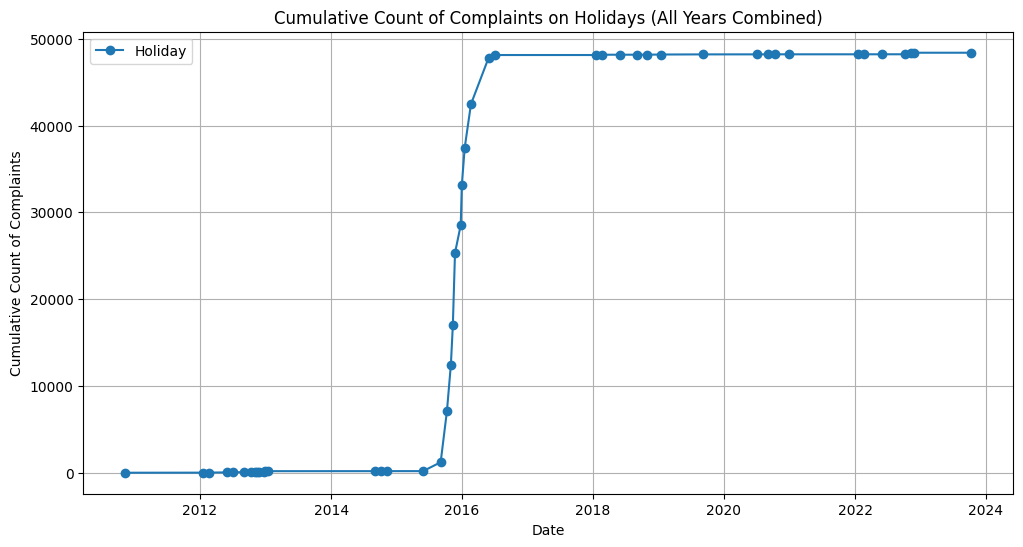

In [99]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the 'Holiday' column
holiday_complaints = df[df['Holiday'] == 'Holiday'].groupby([df['Created Date'].dt.date, df['Holiday']]).size().unstack().cumsum()

# Sort holidays by total complaints in descending order
sorted_holidays = holiday_complaints.sum().sort_values(ascending=False).index

# Plotting
plt.figure(figsize=(12, 6))
for holiday in sorted_holidays:
    plt.plot(holiday_complaints.index, holiday_complaints[holiday], label=holiday, marker='o')

plt.title('Cumulative Count of Complaints on Holidays (All Years Combined)')
plt.xlabel('Date')
plt.ylabel('Cumulative Count of Complaints')
plt.legend()
plt.grid(True)
plt.show()


<Figure size 1400x800 with 0 Axes>

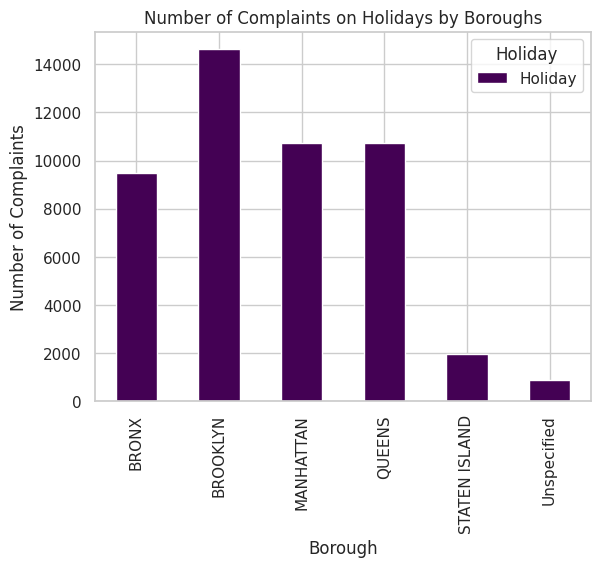

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'Holiday' and 'Borough' columns
holiday_borough_complaints = df[df['Holiday'] == 'Holiday'].groupby(['Borough', 'Holiday']).size().unstack()

# Plotting separate bar groups for each borough with bars for each festival
plt.figure(figsize=(14, 8))
sns.set(style='whitegrid')
holiday_borough_complaints.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Number of Complaints on Holidays by Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Complaints')
plt.legend(title='Holiday', loc='upper right')
plt.show()


In [103]:
import pandas as pd

# Assuming 'df' is your original DataFrame
holiday_dates_mapping = {
    '01/01': "New Year's Day",
    '10/31': 'Halloween',
    '11/11': 'Veterans Day',
    '11/23': 'Thanksgiving',
    '12/25': 'Christmas Day',
    '07/04': 'Independence Day',
    '09/04': 'Labor Day',
    '10/09': 'Columbus Day',
    '05/29': 'Memorial Day',
    '01/16': 'Martin Luther King, Jr. Day',
    '12/31': "New Year's Eve",
    '02/20': "Presidents' Day"
}

# Extract dates for US holidays
holiday_dates = pd.to_datetime(list(holiday_dates_mapping.keys()), format='%m/%d')

# Filter DataFrame for holiday data
holiday_df = df[df['Holiday'] == 'Holiday']

# Update holiday labels based on mapping
holiday_df['Holiday'] = holiday_df['Created Date'].dt.strftime('%m/%d').map(holiday_dates_mapping)

# Print the resulting DataFrame
print(holiday_df)


        Unique Key        Created Date             Closed Date Agency  \
13        31461975 2015-09-04 08:15:00  09/16/2015 12:00:00 PM   DSNY   
188       31465259 2015-09-04 06:41:16  09/04/2015 07:15:12 AM   NYPD   
215       31463194 2015-09-04 23:12:53  09/05/2015 04:40:31 AM   NYPD   
229       31465704 2015-09-04 16:43:00  09/08/2015 10:43:00 AM    DOT   
251       31460841 2015-09-04 23:09:20  09/05/2015 12:49:55 AM   NYPD   
...            ...                 ...                     ...    ...   
1844238   33748035 2016-07-04 01:22:37  07/04/2016 04:07:37 AM   NYPD   
1844675   33749031 2016-07-04 02:10:45  07/19/2016 10:18:06 PM   NYPD   
1844904   33747687 2016-07-04 00:13:57  07/04/2016 03:53:58 PM   NYPD   
1845463   33749609 2016-07-04 00:03:30  07/04/2016 01:12:52 AM   NYPD   
1846112   33749669 2016-07-04 00:41:10  07/04/2016 03:35:05 AM   NYPD   

                             Agency Name           Complaint Type  \
13              Department of Sanitation         Dirty

<ipython-input-103-a1c56708771c>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  holiday_df['Holiday'] = holiday_df['Created Date'].dt.strftime('%m/%d').map(holiday_dates_mapping)


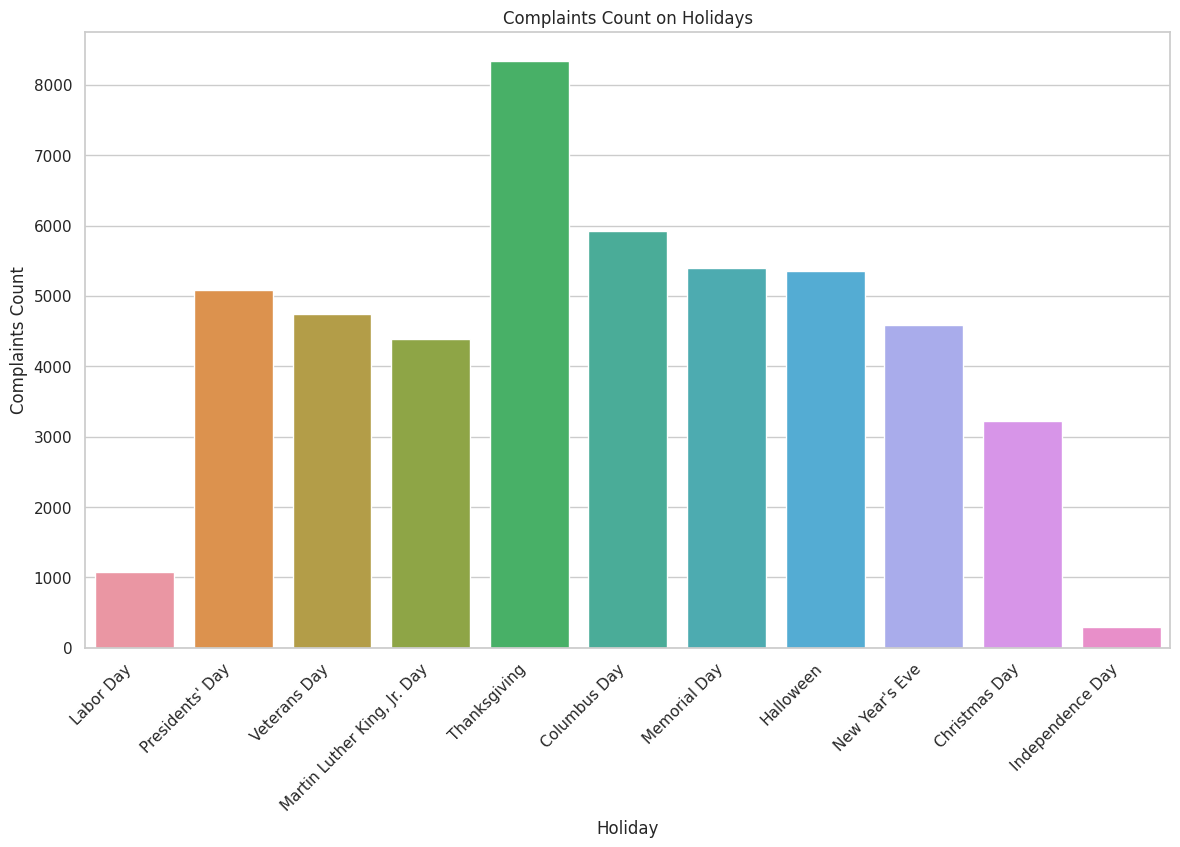

In [107]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Holiday', data=holiday_df)
plt.title('Complaints Count on Holidays')
plt.xlabel('Holiday')
plt.ylabel('Complaints Count')
plt.xticks(rotation=45, ha='right')
plt.show()


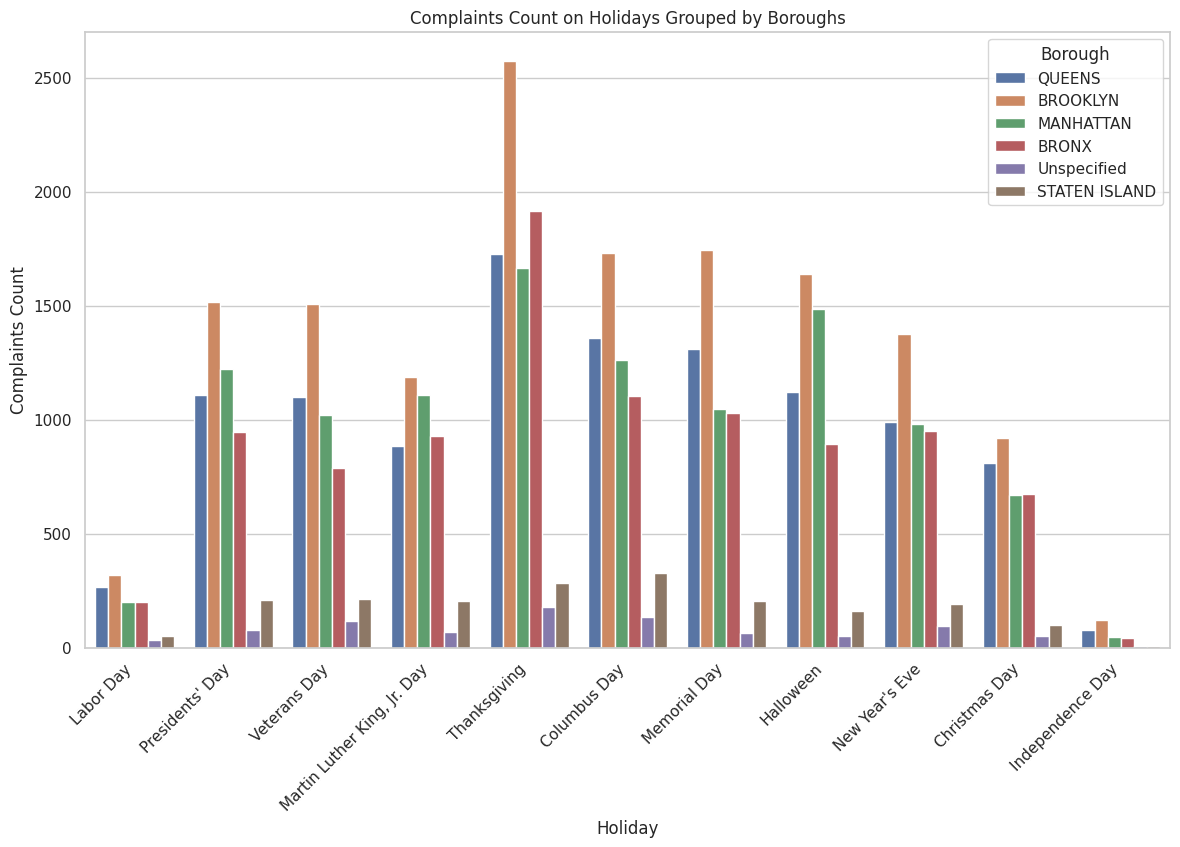

In [106]:


# Assuming 'holiday_df' is your DataFrame with updated holiday labels
plt.figure(figsize=(14, 8))
sns.countplot(x='Holiday', hue='Borough', data=holiday_df)
plt.title('Complaints Count on Holidays Grouped by Boroughs')
plt.xlabel('Holiday')
plt.ylabel('Complaints Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Borough')
plt.show()
